Create a new notebook to see effect of data augmentation a baseline model (TrainBaseModelAugmentation.ipynb):
Add data augmentation.
Select at least 3 augmentations that make sense for your datasets (see Keras Image Augmentation Layers).
Visualize the data augmentation to make sure it's working as expected.
Train the same model now with data augmentation.
Save the new model.
Test if data augmentation is helping:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
archive_path = '/content/drive/MyDrive/archive'

In [12]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define paths to your dataset directories
train_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'
test_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'

# Define image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32




In [16]:
# Define additional augmentation parameters
rotation_range = 20
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2

# Create an ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Create an ImageDataGenerator for augmented training data
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=lambda x: x  # Placeholder for custom preprocessing function
)


In [17]:
# Add additional augmentation layers directly to the train_datagen_augmented
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Add augmentation layers
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [18]:
# Add additional augmentation layers directly to the train_datagen_augmented
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Add augmentation layers
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [19]:
# Add additional augmentation layers directly to the train_datagen_augmented
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Create an ImageDataGenerator for validation and test data without data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 900 images belonging to 6 classes.


In [20]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle test data
)

Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet  # MobileNet model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


In [27]:
# Define the number of classes
NUM_CLASSES = 6  # Since we have 6 classes in the jellyfish dataset


In [28]:
# Load pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [32]:
# Train the model with data augmentation
history_augmented = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)



Epoch 1/20
29/29 [==============================] - 225s 8s/step - loss: 1.0663 - accuracy: 0.6311 - val_loss: 0.7576 - val_accuracy: 0.7692
Epoch 2/20
29/29 [==============================] - 50s 2s/step - loss: 0.2652 - accuracy: 0.9156 - val_loss: 0.8669 - val_accuracy: 0.7179
Epoch 3/20
29/29 [==============================] - 51s 2s/step - loss: 0.1467 - accuracy: 0.9600 - val_loss: 0.8718 - val_accuracy: 0.7692
Epoch 4/20
29/29 [==============================] - 50s 2s/step - loss: 0.1059 - accuracy: 0.9722 - val_loss: 0.9086 - val_accuracy: 0.7692
Epoch 5/20
29/29 [==============================] - 50s 2s/step - loss: 0.0939 - accuracy: 0.9733 - val_loss: 0.9543 - val_accuracy: 0.7949
Epoch 6/20
29/29 [==============================] - 48s 2s/step - loss: 0.0927 - accuracy: 0.9633 - val_loss: 1.0382 - val_accuracy: 0.7692
Epoch 7/20
29/29 [==============================] - 54s 2s/step - loss: 0.0543 - accuracy: 0.9889 - val_loss: 1.0995 - val_accuracy: 0.7436
Epoch 8/20
29/29 [=

In [36]:
# Define the file path where you want to save the model
model_path = "/content/drive/MyDrive/TrainBaseModelAugmentation.h5"

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: /content/drive/MyDrive/TrainBaseModelAugmentation.h5


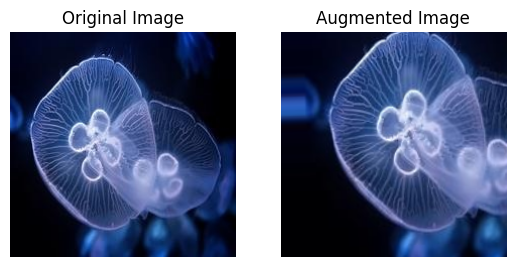

In [33]:
# Visualize the data augmentation to make sure it is working as expected
import matplotlib.pyplot as plt

# Select an image from the dataset
img_path = "/content/drive/MyDrive/archive/Moon_jellyfish/02.jpg"  #  path to an image in my dataset

# Load and display the original image
original_img = plt.imread(img_path)
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')

# Apply data augmentation to the image
augmented_img = train_datagen.random_transform(original_img)

# Display the augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_img)
plt.axis('off')

plt.show()


As we can see here, the image has been augmented by scaling.

Found 900 images belonging to 6 classes.


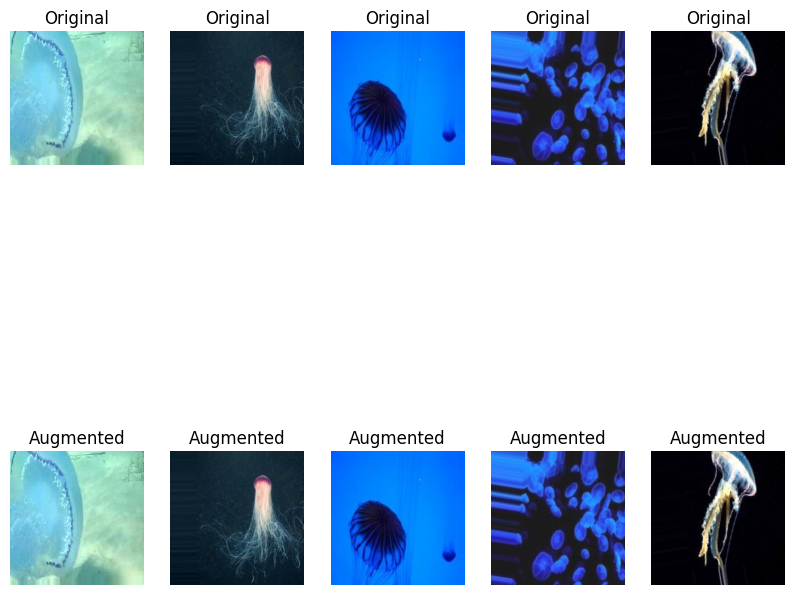

In [35]:
import matplotlib.pyplot as plt

# Define the number of images to visualize
num_images = 5

# Generate augmented images
augmented_images = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=num_images,
    class_mode='categorical'
)

# Get a batch of images
images, labels = augmented_images.next()

# Visualize original and augmented images
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title('Original')

    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title('Augmented')

plt.show()


Comments: I was able to see augmentation in the first image I chose from the dataset. But for this set of images, I am not able to see any changes in augmentation for some reason. This could be because different augmentation techniques have varying effects on different types of images.